In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr #pour calculer le coefficient de corrélation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #pour standardiser les données

In [7]:
# Importation des données
grains_file="C:/Users/Enzo/OneDrive/Bureau/Cours/TER_Art/Codes_brouillon_personnel/mais.csv"
grains_df = pd.read_csv(grains_file,header=None,names=['largeur','longueur'])
grains_df

,largeur,longueur
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


In [9]:
grains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   largeur   210 non-null    float64
 1   longueur  210 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


Calcul du cefficient de Pearson des deux variables :

In [12]:
# Création d'un tableau numpy 2D à partir de grains_df
grains_array=grains_df.values
l=grains_array[:,0]
L=grains_array[:,1]

# Coefficient de corrélation entr la largeur et la longueur des grains
coef_cor,pvalue=pearsonr(l,L)
print(coef_cor,pvalue)
#forte corrélation positive et statistiquement significative

0.8604149377143469 8.121332906192771e-63


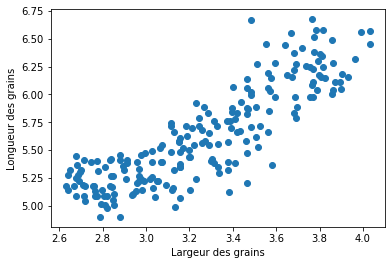

In [14]:
# Visualisation du nuage de points
plt.scatter(l,L)
plt.xlabel('Largeur des grains')
plt.ylabel('Longueur des grains')
plt.show()

In [17]:
# ACP permet de décorréler ces variables

# Création d'une instance de la classe PCA
model_acp = PCA(n_components=2) #l'argument n_components est par défault égal au nombre de variables de l'ensemble des données

# Application du modèle aux données
grains_acp = model_acp.fit_transform(grains_array) #ACP + standardisation
grains_acp

array([[ 1.37546375e-01,  4.48701536e-02],
       [-9.77931663e-03, -1.04853394e-01],
       [-2.09502378e-01, -2.76013257e-01],
       [-1.57279093e-01, -2.87226133e-01],
       [ 2.16563481e-01, -2.14516232e-01],
       [-1.52413159e-01, -1.96070646e-01],
       [-5.01506254e-02, -4.21863576e-02],
       [-1.32653965e-01, -1.66650003e-01],
       [ 4.58374510e-01,  1.12533346e-01],
       [ 3.53956661e-01, -2.62395364e-02],
       [ 5.51223081e-02,  6.73928808e-02],
       [-1.83358870e-01, -7.74647317e-02],
       [-1.83867947e-01, -7.52873846e-02],
       [-1.80584321e-01, -1.66510665e-02],
       [-2.05119162e-01,  1.75694184e-02],
       [-1.65911373e-01, -2.34590748e-01],
       [-3.12392996e-01, -4.21318181e-01],
       [ 8.51314987e-02, -2.61320442e-01],
       [-1.93203059e-01, -4.30192803e-01],
       [-4.43556277e-01, -9.60472265e-02],
       [-6.01669339e-02,  1.18514214e-01],
       [-1.41381057e-01,  3.22563195e-04],
       [ 1.50648029e-01, -1.97778454e-01],
       [-6.

In [18]:
# Composantes principales
comp1=grains_acp[:,0]
comp2=grains_acp[:,1]

In [20]:
# Calcul du cefficient de Pearson entre les composantes :
coef_cor_comp,pvalue_comp=pearsonr(comp1,comp2)
print(coef_cor_comp,pvalue_comp)
#pas de corrélation linéaire

-4.163336342344337e-17 0.999999999999971


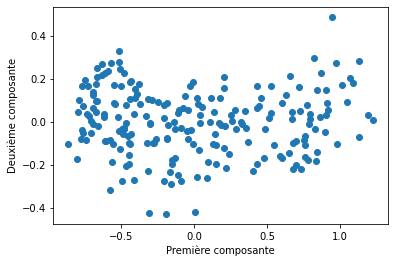

In [21]:
# Visualisation du nuage de points 
plt.scatter(comp1,comp2)
plt.xlabel('Première composante')
plt.ylabel('Deuxième composante')
plt.show()

In [26]:
# Attribut du modèle PCA pour retrouver la quantité de variance expliquée par chaque composante
model_acp.explained_variance_

array([0.31595462, 0.02301882])

In [25]:
# En pourcentage
model_acp.explained_variance_ratio_

array([0.93209254, 0.06790746])

In [27]:
# Cumulé
model_acp.explained_variance_ratio_.cumsum()

array([0.93209254, 1.        ])

In [28]:
#
model_acp.n_components_

2

<function matplotlib.pyplot.show(close=None, block=None)>

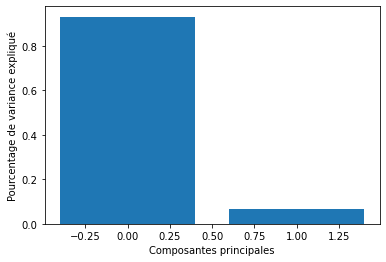

In [31]:
plt.bar(range(model_acp.n_components_),model_acp.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliqué')
#plt.xticks(range(model_acp.n_components_))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

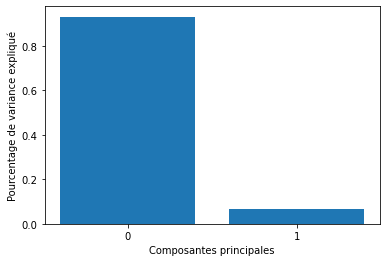

In [32]:
plt.bar(range(model_acp.n_components_),model_acp.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliqué')
plt.xticks(range(model_acp.n_components_)) #adapte l'échelle de l'axe des abscisses au nomdre de composante
plt.show

In [33]:
# Attribut pour retrouver les composants principaux au niveau de chaque axe
model_acp.components_
#Ce tableau nous indique dans quelle mesure le vecteur de chaque composante principale est affectée par chaque variable originelle 

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])